
## *<center>----- Banking Transactions Analysis -----</center>*
### <center>Name: "Akash Yanpure"</center>

***
### <center>Importing Libraries</center>  


In [2]:
import bs4
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sn
import datetime

***
## <center> A. Data Source 1 </center>  
***


### About the dataset :
https://www.bankofengland.co.uk/weekly-report/balance-sheet-and-weekly-report

This dataset is published every Thursday on The Bank of England Database and shows positions as at the close of Wednesday. The Weekly Report typically discloses over 90% of our balance sheet by value. It includes the complete data, updated with the weekly amount of various factors, for the given period.
The Bank of England gathers and analyse the data from various banks and building societies, credit unions, insurers and mortgage companies. Then they publish useful data in their database as a part of statistical releases.

### For this dataset we have applied the scraping technique using Beautiful Soup library:
https://pypi.org/project/beautifulsoup4/

Beautiful Soup is a Python library for getting data out of HTML, XML, and other markup languages. 
Beautiful Soup helps us to pull particular content from a webpage, removes the HTML markup, and save the information. 
It works with parser to provide available ways of navigating, searching, and modifying the parse tree.


### <center>Scraping Data</center>  


In [3]:
myurl = 'https://www.bankofengland.co.uk/weekly-report/balance-sheet-and-weekly-report'

# # ? ---------Navigating to site --------------#

myurl = 'https://www.bankofengland.co.uk/boeapps/database/fromshowcolumns.asp?Travel=NIxAZxSUx&FromSeries=1&ToSeries=50&DAT=RNG&FD=1&FM=Jan&FY=2018&TD=31&TM=Dec&TY=2027&FNY=Y&CSVF=TT&html.x=66&html.y=26&SeriesCodes=RPWB56A,RPWB58A,RPWB9R8,RPWBV79,RPWB55A,RPWB68A,RPWB67A,RPWBL59,RPWZ4TJ,RPWZ4TK,RPWZ4TL,RPWZ4TM,RPWZO8Q,RPWZOQ4,RPWZOQ3,RPWB59A,RPWZ4TN&UsingCodes=Y&Filter=N&title=Bank%20of%20England%20Weekly%20Report&VPD=Y'

uClient = uReq(myurl)
page_html = uClient.read()
uClient.close()

page_soup = soup(page_html, "lxml")


In [4]:
table_soup = page_soup.findAll('table',{"id":"stats-table"})[0]
# table_soup
table_df = pd.read_html(str(table_soup))[0]
frshTable = 0
column_names = {}
# table_df


In [226]:

print("\nDataset Shape : ",table_df.shape)
# print("\nDataset Value Counts : ",table_df.count())
# print("\nDataset Information : \n")
# table_df.head(7)
# print(table_df.info())


Dataset Shape :  (164, 12)


***
## <center> B. EDA 1</center>
***

#### Handling Missing Data #1
###### Dimentionality reduction and preliminary data cleansing 

In [6]:
# Dropping irrelevant columns with 0 values
for colname in table_df:
    if table_df[colname].sum() == 0:
        # print(colname)
        table_df = table_df.drop(columns=colname)



In [7]:
# Renaming Columns for better referencing
i = 0
for colname in table_df.columns:
    if colname != 'Date' and frshTable == 0:
        table_df = table_df.rename(columns={colname: i})
        column_names[i] = colname
        i = i + 1
frshTable = 1;   
print("\nNew Dataframe :")
table_df


New Dataframe :


,Date,0,1,2,3,4,5,6,7,8,9,10
0,03 Jan 18,465536,76225,4417,0,9944,547944,NaN,NaN,NaN,4415,4438
1,10 Jan 18,467473,74747,4417,0,9912,548066,NaN,NaN,NaN,4407,4430
2,17 Jan 18,469351,73972,4660,0,9939,548276,NaN,NaN,NaN,4309,4333
3,24 Jan 18,471629,73506,4660,0,9890,551009,NaN,NaN,NaN,4190,4214
4,31 Jan 18,472128,73329,4660,0,9863,551864,NaN,NaN,NaN,4191,4214
...,...,...,...,...,...,...,...,...,...,...,...,...
159,20 Jan 21,762656,84100,4788,0,14303,756777,46975.0,63996.0,12281.0,4478,4476
160,27 Jan 21,778484,84120,4788,0,14393,761217,46791.0,66617.0,12058.0,4458,4457
161,03 Feb 21,787616,84258,4793,0,14473,765657,46644.0,69867.0,12530.0,4476,4475
162,10 Feb 21,790165,84220,4603,0,14518,767137,46449.0,69867.0,12231.0,4414,4413


## Column reference after renaming :
#### 0 = reserve balance liabilities                  
#### 1 = notes in circulation total
#### 2 = indexed long-term repos with Bank of England counterparties
#### 3 = contingent term repo facility with Bank of England counterparties
#### 4 = denominated bond holdings total
#### 5 = loan to Asset Purchase Facility total
#### 6 = on the Bank of England balance sheet
#### 7 = with additional incentives for SMEs (TFSME)
#### 8 = loan to Covid Corporate Financing Facility total
#### 9 = foreign currency public securities issued total
#### 10 = all foreign currency reserve assets total 




In [8]:
# Converting STR date to actual datetime format
table_df['Date'] = pd.to_datetime(table_df['Date'])

#### Handling Missing Data #2

In [236]:
# Removing NA values

table_df[6] = table_df[6].fillna(0.0)
table_df[7] = table_df[7].fillna(0.0)
table_df[8] = table_df[8].fillna(0.0)
#cannot insert mean or mode value as data is very sensitive
table_df.sum()

0     90098508.0
1     12572060.0
2      1693696.0
3        98525.0
4      2072469.0
5     90093956.0
6     10855053.0
7      1669379.0
8       708738.0
9       763021.0
10      780616.0
dtype: float64

***
## <center>Correlation Matrix</center>  

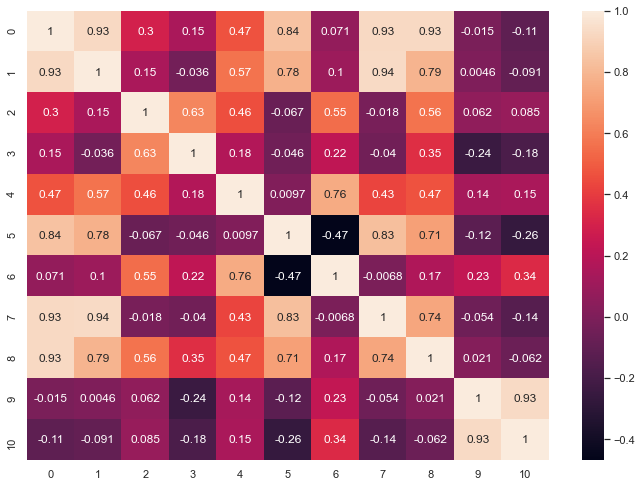

In [10]:
corrMatrix = table_df.corr()
sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.heatmap(corrMatrix, annot=True)
plt.show()

***
## <center>Visulization of key features</center>  

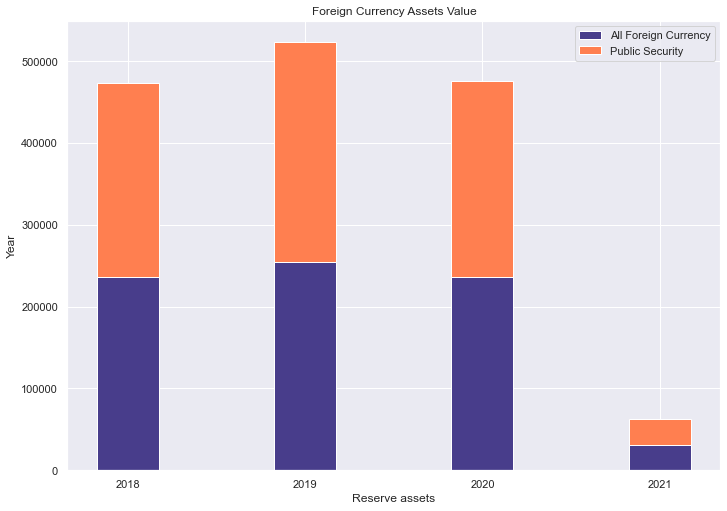

In [11]:
data_2018_FXP  = table_df[9].where(table_df['Date'] < '01 Jan 2019').dropna()
data_2019_FXP  = table_df[9].where(table_df['Date'] < '01 Jan 2020').where(table_df['Date'] > '01 Jan 2019').dropna()
data_2020_FXP  = table_df[9].where(table_df['Date'] < '01 Jan 2021').where(table_df['Date'] > '01 Jan 2020').dropna()
data_2021_FXP  = table_df[9].where(table_df['Date'] < '01 Jan 2022').where(table_df['Date'] > '01 Jan 2021').dropna()

data_2018_All  = table_df[10].where(table_df['Date'] < '01 Jan 2019').dropna()
data_2019_All  = table_df[10].where(table_df['Date'] < '01 Jan 2020').where(table_df['Date'] > '01 Jan 2019').dropna()
data_2020_All  = table_df[10].where(table_df['Date'] < '01 Jan 2021').where(table_df['Date'] > '01 Jan 2020').dropna()
data_2021_All  = table_df[10].where(table_df['Date'] < '01 Jan 2022').where(table_df['Date'] > '01 Jan 2021').dropna()


# table_df['Date']
labels = ['2018', '2019', '2020', '2021']
nonavoider = [data_2018_FXP.sum(),data_2019_FXP.sum(),data_2020_FXP.sum(),data_2021_FXP.sum()]
avoider = [data_2018_All.sum(),data_2019_All.sum(),data_2020_All.sum(),data_2021_All.sum()]

width = 0.35       # the width of the bars
fig, ax = plt.subplots()
#Stacked bars
ax.bar(labels, nonavoider, width, label='All Foreign Currency',color='DARKSLATEBLUE')
ax.bar(labels, avoider, width, bottom=nonavoider, label='Public Security',color='CORAL')

ax.set_ylabel('Year')
ax.set_xlabel('Reserve assets')
ax.set_title('Foreign Currency Assets Value')
ax.legend()
plt.show()
#Save fig with custom dpi
fig.savefig('Foreign Currency.png',dpi=500)

#### Note Circulation Value Anomaly Detection :

[Text(0, 0.5, ''), Text(0.5, 0, 'Notes circulation')]

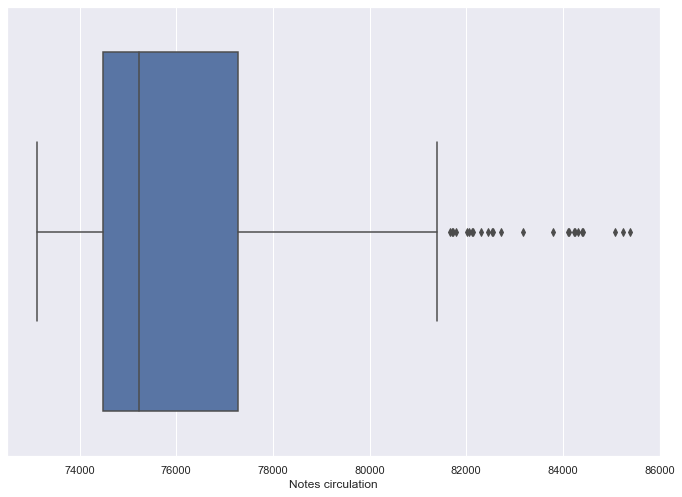

In [225]:
ax = sn.boxplot(x=table_df[1])
ax.set(xlabel='Notes circulation', ylabel='')

### <center> 5 key Education Insights of Dataset 1 </center>

#### 1. Foreign Currency reserve is equally distributed over public authority and all other.
#### 2. Notes Circulation anomalies canbe seen, which helps to audit or identify fraud cases
#### 3. Total liabilities reserved can be used for facility purchase as the amount of reserve is nearly equal to facility value
#### 4. loan to covid facility is much ower than loan reserved for facility and assets purchase (Hardly 9%)
#### 5. contingent term repo facility with Bank of England counterparties has the lowest transactional value

***
## <center>A. Data Source 2 </center>  
***

### About the dataset :

https://www.kaggle.com/apoorvwatsky/bank-transaction-data

We found this dataset on kaggle daabase platform.
This dataset consists extracted bank account statements of various bank accounts.
It is an opoen source dataset with large number of transaction details.

### <center>Importing Dataset</center>  

In [200]:
global dataset2_df
dataset2_df = pd.read_excel('https://drive.google.com/uc?export=download&id=1QCk_te229I56RkFt2RkzU58FD2kedglZ')

In [155]:
dataset2_df.info()
# np.std(dataset2_df['WITHDRAWAL AMT'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116201 entries, 0 to 116200
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Account No           116201 non-null  object        
 1   DATE                 116201 non-null  datetime64[ns]
 2   TRANSACTION DETAILS  113702 non-null  object        
 3   CHQ.NO.              905 non-null     float64       
 4   VALUE DATE           116201 non-null  datetime64[ns]
 5   WITHDRAWAL AMT       53549 non-null   float64       
 6   DEPOSIT AMT          62652 non-null   float64       
 7   BALANCE AMT          116201 non-null  float64       
 8   .                    116201 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 8.0+ MB


***
## <center> B. EDA 2</center>
***  

#### Handling Missing Data #1

In [201]:
#Removing irrelevant columns
dataset2_df = dataset2_df.drop(columns='CHQ.NO.')
dataset2_df = dataset2_df.drop(columns='.')

In [202]:
# Replacing NaN values with 0 and renaming mispelled column names
dataset2_df['WITHDRAWAL AMT'] = dataset2_df['WITHDRAWAL AMT'].fillna(0) 
# dataset2_df = dataset2_df.rename(columns={' WITHDRAWAL AMT ': 'WITHDRAWAL AMT'})
dataset2_df['DEPOSIT AMT'] = dataset2_df['DEPOSIT AMT'].fillna(0)
# dataset2_df = dataset2_df.rename(columns={' DEPOSIT AMT ': 'DEPOSIT AMT'})
dataset2_df['TRANSACTION DETAILS'] = dataset2_df['TRANSACTION DETAILS'].fillna(0)
dataset2_df.isna().sum()

Account No             0
DATE                   0
TRANSACTION DETAILS    0
VALUE DATE             0
WITHDRAWAL AMT         0
DEPOSIT AMT            0
BALANCE AMT            0
dtype: int64

In [256]:
dataset2_df['TRANSACTION DETAILS'].value_counts()

FDRL/INTERNAL FUND TRANSFE          8826
FDRL/NATIONAL ELECTRONIC F          6261
INTERNAL FUND TRANSFER IN           3250
TRF TO  Indiaforensic SERVICES I    3081
0                                   2499
                                    ... 
RTGS/SBINH15334866521/Indfor           1
RTGS/ICICH17305880822/EKO              1
CR801110518120/RMCPL14211/1            1
CHQ DEP/775853/OWDEL1/KAR              1
NEFT/N222180606830312/USH              1
Name: TRANSACTION DETAILS, Length: 44807, dtype: int64

In [203]:
#Dropping Duplicates
dataset2_df = dataset2_df.drop_duplicates()

In [204]:
#finding maximum and minimum values
print(dataset2_df['WITHDRAWAL AMT'].max())
print(dataset2_df['DEPOSIT AMT'].max())


459447546.36
544800000.0


### Balance Amount Distribution using histogram:

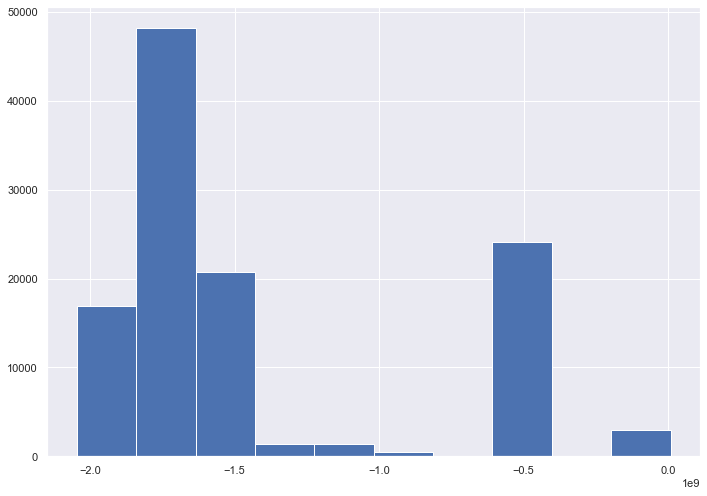

In [211]:
dataset2_df['BALANCE AMT'].hist(bins=10)

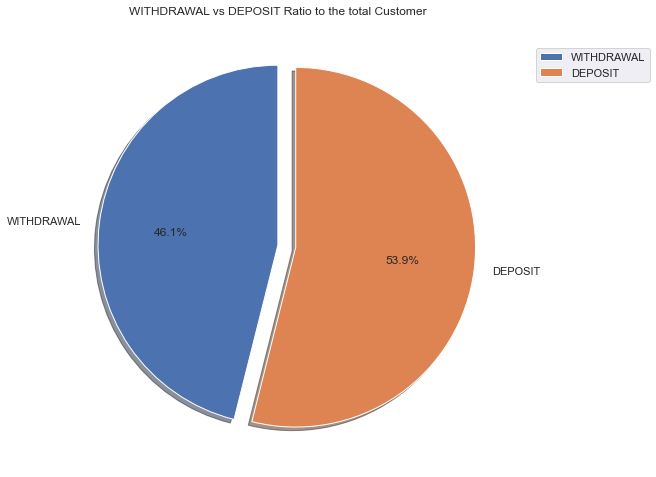

In [100]:
dataset2_df['WITHDRAWAL AMT'].max()

Nonhealthworker = np.count_nonzero(dataset2_df['WITHDRAWAL AMT'])
#Healthworker count
healthworker = np.count_nonzero(dataset2_df['DEPOSIT AMT'])
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = 'WITHDRAWAL', 'DEPOSIT'
sizes = [Nonhealthworker, healthworker]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.legend(loc=10,bbox_to_anchor=(1.2, 0, 0, 1.8))
plt.title("WITHDRAWAL vs DEPOSIT Ratio to the total Customer")
plt.show()

fig.savefig('withdrawl Ratio.png',dpi = 500)

### <center> 5 key Education Insights of Dataset 2 </center>

#### 1. FDRL/INTERNAL FUND TRANSFE has the highest transactions over the period
#### 2. Deposit Amount and wishdrawal amount values are highly correlated to balance Amount
#### 3. Balance amount data range is very much wide as it has high variance value
#### 4. Deposit Rate is greater than the withdrawal
#### 5. People hardly use cheques nowadays 

***
## <center> A. Data Source 3 </center>  
***

### About the dataset :
I have found this dataset created by Dem Data -- https://demodata.ai/banking
Demo Data is a company built by veterans in the data, analytics, and AI software industries.
Demo datasets are based on real-world data and trends.
They provide live, real-world datasets tailored to various sectors to bring our demos to the life and better train our ML models.

Content:
Transactions, withdrawals, and deposits of customers of a global bank, with details on the branch and account.
In the given dataset there are n no branches distributed geographically concerning various account no.

Kaggle link : https://www.kaggle.com/demodatauk/full-banking-transaction-log-sample


In [218]:
dataset3_df = pd.read_excel("https://drive.google.com/uc?export=download&id=1fkTQK4wlih9j9iC52CNcDvEXnDiJKMU_")
dataset3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   transaction_id         10 non-null     object        
 1   account_no             10 non-null     int64         
 2   transaction_timestamp  10 non-null     datetime64[ns]
 3   deposit_amt            10 non-null     float64       
 4   withdrawal_amt         10 non-null     float64       
 5   balance_amt            10 non-null     float64       
 6   chq_no                 10 non-null     object        
 7   transaction_details    10 non-null     object        
 8   value_date             10 non-null     datetime64[ns]
 9   transaction_sector     10 non-null     object        
 10  bank_id                10 non-null     int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 1008.0+ bytes


In [219]:
dataset3_df.isna().sum() # NA values not found

transaction_id           0
account_no               0
transaction_timestamp    0
deposit_amt              0
withdrawal_amt           0
balance_amt              0
chq_no                   0
transaction_details      0
value_date               0
transaction_sector       0
bank_id                  0
dtype: int64

***
## <center> B. EDA 3</center>
***  

In [220]:
#finding maximum and minimum values
print(dataset3_df['withdrawal_amt'].max())
print(dataset3_df['deposit_amt'].max())
print(dataset3_df['balance_amt'].max())


500.0
1490.0
203444.79


### Correlation Matrix :

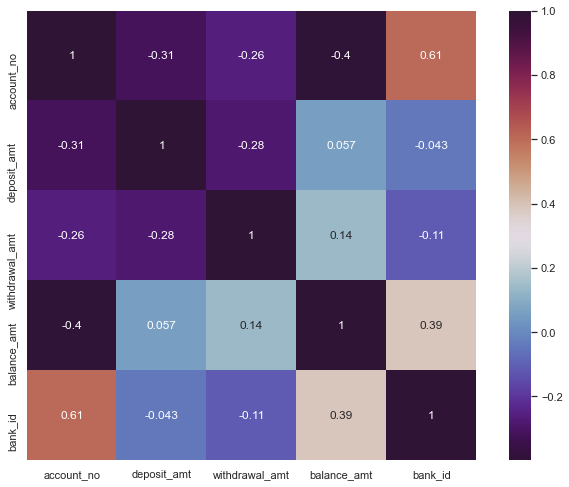

In [223]:
sn.heatmap(dataset3_df.corr(),square=True,annot=True,cmap= 'twilight_shifted')

In [234]:
dataset3_df['account_no'].unique()

array([409000000000,      1196428,      1196711], dtype=int64)

### Valueable customer depending on Account Balance :

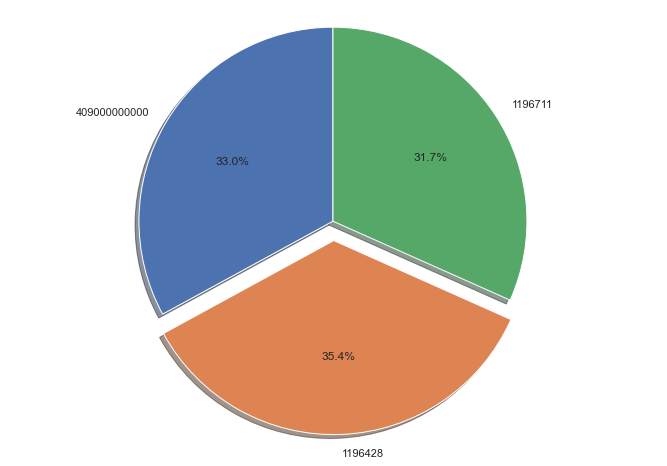

In [235]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = dataset3_df['account_no'].unique()
ac1 = dataset3_df['balance_amt'].where(dataset3_df['account_no'] == 409000000000).sum()
ac2 = dataset3_df['balance_amt'].where(dataset3_df['account_no'] == 1196428).sum()
ac3 = dataset3_df['balance_amt'].where(dataset3_df['account_no'] == 1196711).sum()
sizes = [ac1,ac2,ac3]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [257]:
dataset3_df['transaction_sector'].value_counts()

Cash deposit              6
Retail                    2
Other                     1
Internal Fund Transfer    1
Name: transaction_sector, dtype: int64

### Dataset Distribution 

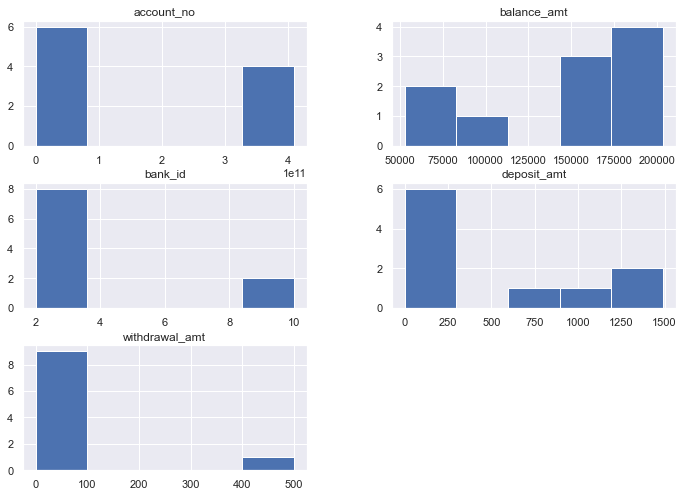

In [228]:
dataset3_df.hist(bins=5)
plt.show()

### <center> 5 key Education Insights of Dataset 3 </center>

#### 1. Dataset size is very small as the number of transactions are very low and from a single day entry
#### 2. All three accounts has equal shares of transactions 33,35,32 percent Respectively
#### 3. Internal fund transfer has high value compared to outside transactions
#### 4. Preferd transaction way is Cash Deposit
#### 5. Only 1 / 10 person use cheque facility


***
## <center>C. Manipulating the Dataset</center>  
***

### Class that accepts the dataset file path as a parameter in the initialisation of the class :

In [189]:
class Banking:
  def __init__(self,filepath):
    try:
        self.path_Dataset = filepath
        self.df = pd.read_excel(self.path_Dataset)
        # self.df= self.df.dropna()
        print("\nColumn Names found : \n",self.df.columns)
    except:
        print("An exception occurred try again with different parameters")  
    
  def stdDev(self,string):
      try:
        # print(self.df[string])
        print("\nStandard Deviation : ")
        print(np.std(self.df[string].fillna(0)))
      except:
        print("An exception occurred  ")

  def mean(self,string):
      try:
        print("\nMean : ")
        print(np.mean(self.df[string].fillna(0)))
      except:
        print("An exception occurred ")

  def outliers(self,string):
        try:
            print("\nOutliers :\n")
            z_scores = stats.zscore(self.df[string].fillna(0))
            abs_z_scores = np.abs(z_scores)
            filtered_entries = (abs_z_scores > 3)
            print(self.df[filtered_entries])
        except:
            print("An exception occurred ")

print("Dataset paths:\n")
print("\n1. https://drive.google.com/uc?export=download&id=1QCk_te229I56RkFt2RkzU58FD2kedglZ\n")
print("\n2. https://drive.google.com/uc?export=download&id=1fkTQK4wlih9j9iC52CNcDvEXnDiJKMU_\n")
      



Dataset paths:


1. https://drive.google.com/uc?export=download&id=1QCk_te229I56RkFt2RkzU58FD2kedglZ


2. https://drive.google.com/uc?export=download&id=1fkTQK4wlih9j9iC52CNcDvEXnDiJKMU_



### === Initialization with dataset path as parameter ===
##### (Use path string from above list)

In [188]:
obj = Banking('https://drive.google.com/uc?export=download&id=1QCk_te229I56RkFt2RkzU58FD2kedglZ')


Column Names found : 
 Index(['Account No', 'DATE', 'TRANSACTION DETAILS', 'CHQ.NO.', 'VALUE DATE',
       'WITHDRAWAL AMT', 'DEPOSIT AMT', 'BALANCE AMT', '.'],
      dtype='object')


### === below are the functions as per requested with perticular parameter ===

In [190]:
# Insert Column name of your choice from above list as afunction parameter

#funtion for standard deviation
obj.stdDev("WITHDRAWAL AMT")

#funtion for Mean
obj.mean("WITHDRAWAL AMT")

#funtion for Outliers / Z-score
obj.outliers("WITHDRAWAL AMT") 
# Parameter added to reduce the execution time as our 2nd dataset is large and taking too much time to calculate z-score


Standard Deviation : 
7696848.178413423

Mean : 
2068757.001099466

Outliers :

           Account No       DATE               TRANSACTION DETAILS  CHQ.NO.  \
2926    409000425051' 2018-10-31                TRF TO  Myur Joshi      NaN   
2939    409000405747' 2016-01-30                 TRF TO Maur Joshi      NaN   
2940    409000405747' 2016-01-30  TRF TO Indiaforensic SERVICES IN      NaN   
2972    409000405747' 2018-09-28         Payments For : 9090000577      NaN   
2991    409000438611' 2016-02-26                   TRF TO  M Joshi      NaN   
...               ...        ...                               ...      ...   
109190  409000362497' 2017-11-20                    IMPS 191117 1C      NaN   
109368  409000362497' 2017-11-27                    IMPS 251117 1C      NaN   
109707  409000362497' 2017-12-11                    IMPS 091217 1C      NaN   
109755  409000362497' 2017-12-12                    IMPS 121217 3C      NaN   
109863  409000362497' 2017-12-18                  

## Questions: 


### 1. What (if any) experience do you have in Cloud Services (eg. AWS, GCP)? 
Ans : I have undergone through online certification for AWS on DataCamp/Udemy platform. I do not hold any professional experience on AWS or GCP But I have basic knowledge of AWS concepts and deploying applications on cloud. I would love to learn more about it professionally in near future.
Certification Link : https://www.datacamp.com/statement-of-accomplishment/course/24fd906a956cec20623f148457bac212a0db1dd5


### 2. What is your experience with building machine learning models? What packages are you familiar with? 
Ans : By being a student of MSc Data Science and 2+ years of diverse-industry experience, I am able to analyze the input dataset and implement the machine learning models thoroughly. 
I also possesses knowledge of machine learning in R and Python both

Some of the packages as below:
Matplotlib, Pandas, NumPy, SciPy, NLTK, Scikit-learn, Statsmodels, Seaborn, ggplot2, mlr, superml, etc.
I am aware of classification and clustering algorithms and implementation for the same.
Also undergoing the practicals on Keras and TensorFlow libraries.

Besides it, I am actively doing freelancing on machine learning projects.
Which consists delivering projects starting from analyzing the dataset, data preprocessing, EDA, Statistical Models along with the Data Visualization techniques.


## <center>Thank You!</center>
### <center>Kindly revert back in case of queries</center>